# Business cycles across countries


In [1]:
import numpy as np
import eurostat
import matplotlib.pyplot as plt
from scipy import optimize

import matplotlib.cm as cm      
from matplotlib.widgets import Slider

CB =  ['#000000','#004488','#BB5566','#DDAA33', 'purple']
LS = ['solid', 'dashed', ':', '-.']


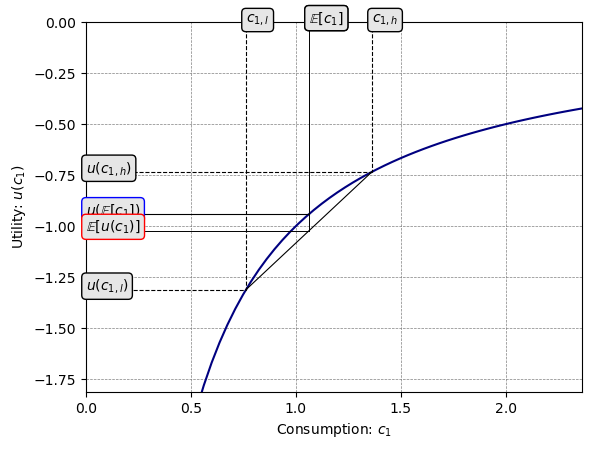

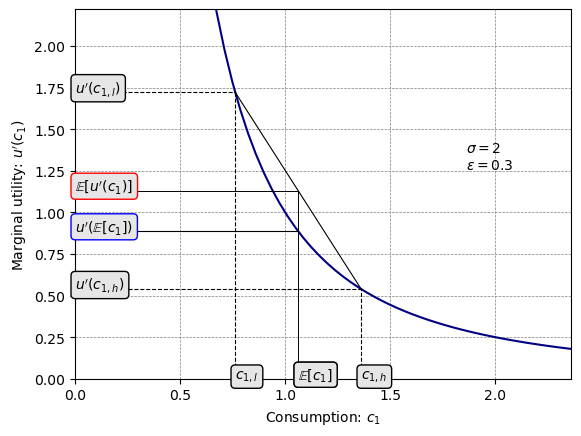

In [2]:
## Parameters -- Calibration high volatility

def uprime(c,σ):
    u= 1/(c**(σ))
    return u
    
def utility(c,σ):
    u= (c**(1-σ)/(1-σ))
    return u

def solvec0(cguess,eps,probh,y0,y1,r,σ,β):
    c1h = y1+eps+(1+r)*(y0-cguess)
    c1l = y1-eps+(1+r)*(y0-cguess)
    ## Difference between RHS and LHS of Euler equation must be zero
    diff = uprime(cguess,σ) - β*(1+r)*(probh*uprime(c1h,σ)+(1-probh)*uprime(c1l,σ))
    return diff

σ = 2
y0 = 1
y1 = 1
r = 0.04
β = 1/(1+r)
probh = 0.5
eps = 0.3

c0guess = 1
## Solve for c0 using a newtownian solver/root finder
c0 = optimize.newton(solvec0,c0guess, args = (eps,probh,y0,y1,r,σ,β), tol=1e-10,maxiter = 1000)
cvec = np.linspace(0.3,4,100)

## Important points on the graph
c1h = y1+eps+(1+r)*(y0-c0)
c1l = y1-eps+(1+r)*(y0-c0)
c1m = y1+(1+r)*(y0-c0)
u1m= probh*utility(c1h,σ)+(1-probh)*utility(c1l,σ)
up1m= probh*uprime(c1h,σ)+(1-probh)*uprime(c1l,σ)



## Normal utility function graph
plt.plot(cvec,utility(cvec,σ), color = 'navy')
plt.xlabel(r'Consumption: $c_1$')
plt.ylabel(r"Utility: $u(c_1)$")
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.plot((c1l,c1l),(0,utility(c1l,σ)), linestyle = 'dashed',color = 'black', linewidth = 0.8)
plt.plot((0,c1l),(utility(c1l,σ),utility(c1l,σ)), linestyle = 'dashed',color = 'black', linewidth = 0.8)

plt.plot((c1h,c1h),(0,utility(c1h,σ)), linestyle = 'dashed',color = 'black', linewidth = 0.8)
plt.plot((0,c1h),(utility(c1h,σ),utility(c1h,σ)), linestyle = 'dashed',color = 'black', linewidth = 0.8)

#(x,x);(y,y)
plt.plot((c1l,c1h),(utility(c1l,σ),utility(c1h,σ)), linestyle = 'solid',color = 'black', linewidth = 0.8)
plt.plot((c1m,c1m),(0,u1m), linestyle = 'solid',color = 'black', linewidth = 0.7)
plt.plot((0,c1m),(u1m,u1m), linestyle = 'solid',color = 'black', linewidth = 0.7)
plt.plot((0,c1m),(utility(c1m,σ),utility(c1m,σ)), linestyle = 'solid',color = 'black', linewidth = 0.8)
plt.ylim(utility(c1l,σ)-0.5,0)
plt.xlim(0,c1h+1)

plt.annotate(r'$ \sigma = $' + str(σ),(c1h+0.5,c1h))
plt.annotate(r'$ \varepsilon = $' + str(eps),(c1h+0.5,c1h-0.1))

## u'
plt.annotate(r'$u(c_{1,l})$',xy= (0,utility(c1l,σ)), xycoords='data',
                         bbox=dict(boxstyle="round", fc="0.9"))
plt.annotate(r'$u(c_{1,h})$',xy= (0,utility(c1h,σ)), xycoords='data',
                         bbox=dict(boxstyle="round", fc="0.9"))
plt.annotate(r'$u(\mathbb{E}[c_{1}])$',xy= (0,utility(c1m,σ)), xycoords='data',
                         bbox=dict(edgecolor='blue',boxstyle="round", fc="0.9"))
plt.annotate(r'$\mathbb{E}[u(c_{1})]$',xy= (0,u1m), xycoords='data',
                         bbox=dict(edgecolor='red',boxstyle="round", fc="0.9"))

## c
plt.annotate(r'$c_{1,l}$',xy= (c1l,0), xycoords='data',
                         bbox=dict(boxstyle="round", fc="0.9"))
plt.annotate(r'$c_{1,h}$',xy= (c1h,0), xycoords='data',
                         bbox=dict(boxstyle="round", fc="0.9"))
plt.annotate(r'$\mathbb{E}[c_{1}]$',xy= (c1m,0), xycoords='data',
                         bbox=dict(boxstyle="round", fc="0.9"))
plt.annotate(r'$\mathbb{E}[c_{1}]$',xy= (c1m,0), xycoords='data',
                         bbox=dict(boxstyle="round", fc="0.9"))
figname = 'urisk_'+str(σ)+str(eps) +'.pdf'
plt.savefig(figname)
plt.show()






## Marginal utility
plt.plot(cvec,uprime(cvec,σ), color = 'navy')
plt.xlabel(r'Consumption: $c_1$')
plt.ylabel(r"Marginal utility: $u'(c_1)$")
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)

## Utility
plt.plot((c1l,c1l),(0,uprime(c1l,σ)), linestyle = 'dashed',color = 'black', linewidth = 0.8)
plt.plot((0,c1l),(uprime(c1l,σ),uprime(c1l,σ)), linestyle = 'dashed',color = 'black', linewidth = 0.8)

plt.plot((c1h,c1h),(0,uprime(c1h,σ)), linestyle = 'dashed',color = 'black', linewidth = 0.8)
plt.plot((0,c1h),(uprime(c1h,σ),uprime(c1h,σ)), linestyle = 'dashed',color = 'black', linewidth = 0.8)

#(x,x);(y,y)
plt.plot((c1l,c1h),(uprime(c1l,σ),uprime(c1h,σ)), linestyle = 'solid',color = 'black', linewidth = 0.8)
plt.plot((c1m,c1m),(0,up1m), linestyle = 'solid',color = 'black', linewidth = 0.7)
plt.plot((0,c1m),(up1m,up1m), linestyle = 'solid',color = 'black', linewidth = 0.7)
plt.plot((0,c1m),(uprime(c1m,σ),uprime(c1m,σ)), linestyle = 'solid',color = 'black', linewidth = 0.8)

plt.ylim(0,uprime(c1l,σ)+0.5)
plt.xlim(0,c1h+1)

plt.annotate(r'$ \sigma = $' + str(σ),(c1h+0.5,c1h))
plt.annotate(r'$ \varepsilon = $' + str(eps),(c1h+0.5,c1h-0.1))

## u'
plt.annotate(r'$u^\prime(c_{1,l})$',xy= (0,uprime(c1l,σ)), xycoords='data',
                         bbox=dict(boxstyle="round", fc="0.9"))
plt.annotate(r'$u^\prime(c_{1,h})$',xy= (0,uprime(c1h,σ)), xycoords='data',
                         bbox=dict(boxstyle="round", fc="0.9"))
plt.annotate(r'$u^\prime(\mathbb{E}[c_{1}])$',xy= (0,uprime(c1m,σ)), xycoords='data',
                         bbox=dict(edgecolor='blue',boxstyle="round", fc="0.9"))
plt.annotate(r'$\mathbb{E}[u^\prime(c_{1})]$',xy= (0,up1m), xycoords='data',
                         bbox=dict(edgecolor='red',boxstyle="round", fc="0.9"))

## c
plt.annotate(r'$c_{1,l}$',xy= (c1l,0), xycoords='data',
                         bbox=dict(boxstyle="round", fc="0.9"))
plt.annotate(r'$c_{1,h}$',xy= (c1h,0), xycoords='data',
                         bbox=dict(boxstyle="round", fc="0.9"))
plt.annotate(r'$\mathbb{E}[c_{1}]$',xy= (c1m,0), xycoords='data',
                         bbox=dict(boxstyle="round", fc="0.9"))
plt.annotate(r'$\mathbb{E}[c_{1}]$',xy= (c1m,0), xycoords='data',
                         bbox=dict(boxstyle="round", fc="0.9"))
figname = 'risk_'+str(σ)+str(eps) +'.pdf'
plt.savefig(figname)

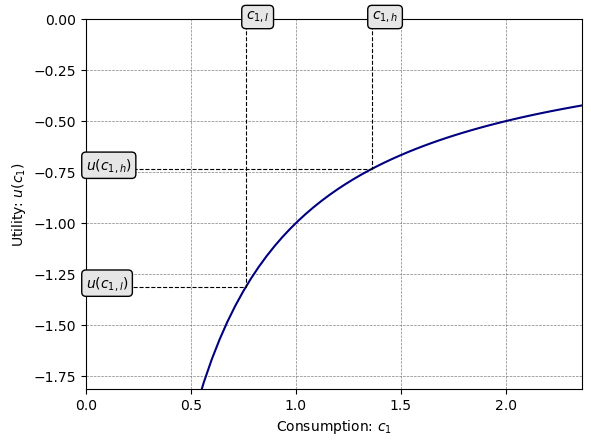

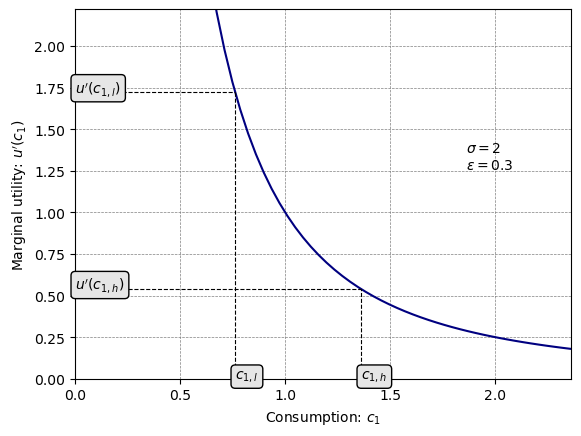

In [4]:
## BASELINE figure
c1h = y1+eps+(1+r)*(y0-c0)
c1l = y1-eps+(1+r)*(y0-c0)
c1m = y1+(1+r)*(y0-c0)

################################################################
## Utility graph
plt.plot(cvec,utility(cvec,σ), color = 'navy')
plt.xlabel(r'Consumption: $c_1$')
plt.ylabel(r"Utility: $u(c_1)$")
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)


u1m= probh*utility(c1h,σ)+(1-probh)*utility(c1l,σ)
plt.plot((c1l,c1l),(0,utility(c1l,σ)), linestyle = 'dashed',color = 'black', linewidth = 0.8)
plt.plot((0,c1l),(utility(c1l,σ),utility(c1l,σ)), linestyle = 'dashed',color = 'black', linewidth = 0.8)

plt.plot((c1h,c1h),(0,utility(c1h,σ)), linestyle = 'dashed',color = 'black', linewidth = 0.8)
plt.plot((0,c1h),(utility(c1h,σ),utility(c1h,σ)), linestyle = 'dashed',color = 'black', linewidth = 0.8)

#(x,x);(y,y)
plt.ylim(utility(c1l,σ)-0.5 ,0)
plt.xlim(0,c1h+1)

plt.annotate(r'$ \sigma = $' + str(σ),(c1h+0.5,c1h))
plt.annotate(r'$ \varepsilon = $' + str(eps),(c1h+0.5,c1h-0.1))

## u'
plt.annotate(r'$u(c_{1,l})$',xy= (0,utility(c1l,σ)), xycoords='data',
                         bbox=dict(boxstyle="round", fc="0.9"))
plt.annotate(r'$u(c_{1,h})$',xy= (0,utility(c1h,σ)), xycoords='data',
                         bbox=dict(boxstyle="round", fc="0.9"))

## c
plt.annotate(r'$c_{1,l}$',xy= (c1l,0), xycoords='data',
                         bbox=dict(boxstyle="round", fc="0.9"))
plt.annotate(r'$c_{1,h}$',xy= (c1h,0), xycoords='data',
                         bbox=dict(boxstyle="round", fc="0.9"))

figname = 'BLurisk_'+str(σ)+str(eps) +'.pdf'
plt.savefig(figname)
plt.show()


################################################################
## Marginal utility
plt.plot(cvec,uprime(cvec,σ), color = 'navy')
plt.xlabel(r'Consumption: $c_1$')
plt.ylabel(r"Marginal utility: $u'(c_1)$")
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)



up1m= probh*uprime(c1h,σ)+(1-probh)*uprime(c1l,σ)
plt.plot((c1l,c1l),(0,uprime(c1l,σ)), linestyle = 'dashed',color = 'black', linewidth = 0.8)
plt.plot((0,c1l),(uprime(c1l,σ),uprime(c1l,σ)), linestyle = 'dashed',color = 'black', linewidth = 0.8)

plt.plot((c1h,c1h),(0,uprime(c1h,σ)), linestyle = 'dashed',color = 'black', linewidth = 0.8)
plt.plot((0,c1h),(uprime(c1h,σ),uprime(c1h,σ)), linestyle = 'dashed',color = 'black', linewidth = 0.8)

#(x,x);(y,y)
plt.ylim(0,uprime(c1l,σ)+0.5)
plt.xlim(0,c1h+1)

plt.annotate(r'$ \sigma = $' + str(σ),(c1h+0.5,c1h))
plt.annotate(r'$ \varepsilon = $' + str(eps),(c1h+0.5,c1h-0.1))

## u'
plt.annotate(r'$u^\prime(c_{1,l})$',xy= (0,uprime(c1l,σ)), xycoords='data',
                         bbox=dict(boxstyle="round", fc="0.9"))
plt.annotate(r'$u^\prime(c_{1,h})$',xy= (0,uprime(c1h,σ)), xycoords='data',
                         bbox=dict(boxstyle="round", fc="0.9"))

## c
plt.annotate(r'$c_{1,l}$',xy= (c1l,0), xycoords='data',
                         bbox=dict(boxstyle="round", fc="0.9"))
plt.annotate(r'$c_{1,h}$',xy= (c1h,0), xycoords='data',
                         bbox=dict(boxstyle="round", fc="0.9"))

figname = 'BLrisk_'+str(σ)+str(eps) +'.pdf'
plt.savefig(figname)
plt.show()